## Load Octopus

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
octopus_folder = '/Users/gr_1/Documents/cosmo_predict/octopus_v2'
a = gpd.read_file(octopus_folder)

## Find basins that which overlap one another

In [16]:

if 1:
    # We want to find where basins intersect, very time consuming
    ca = a.area
    is2 = [np.where(a.intersects(a.iloc[i].geometry.buffer(-.001))) for i in range(len(a))] #List of basins that overlap - This part takes a really long time
    #np.save('is2',is2)
else:
    is2 = np.load('is2.npy',allow_pickle=True)
    is1=np.load('is1.npy',allow_pickle=True)

## Of the overlapping basins, find those that overlap by 95%

In [4]:
is1 = []
j2=0
for j in a.index:
    is1.append([])
    for i in range(len(is2[j2])):
        #If they are less than 5% different in terms of drainage area, we will combine them
        try:
            intersection = a.loc[j]['geometry'].intersection(a.loc[is2[j][i]]['geometry']).area
        except Exception as e: 
            #At the moment geopandas does not like the geom of 1 of the basins....
            print(e)
            continue
        ipct = np.abs(intersection-a.loc[j]['geometry'].area)/a.loc[is2[j][i]]['geometry'].area
        if ipct < .05:
            print(ipct)
            is1[ j ].append(is2[ j ][ i ])#List of basins and their similar basins
    j2+=1
is2 = is1.copy()

7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
7.918276062172437e-15
1.627939368754704e-14
0.004083045979056856
1.5206027070785696e-14
1.5268113978474267e-14
8.89886642849862e-16
0.030694018335971747
3.515021693372504e-16
0.025638457214984114
5.183485323826652e-13
9.493539090220254e-15
4.44943321424931e-16
4.586004198912158e-16
6.3448549237544064e-15
3.3582956619288688e-15
3.3582956619288688e-15
3.3582956619288688e-15
3.3582956619288688e-15
1.5581274726874427e-14
0.0005890482792333671
0.0005890482792333671
0.0005890482792333671
0.0005890482792333671
0.0005908981924887197
0.0005908981924887197
0.0006094709308311387
0.0006094709308311387
2.0958072463349692e-14
0.0016337722555722068
3.79905834041481e-16
4.777791068052371e-16
8.162397463620296e-15
0.016975689627679178
0.03571039594944613
0.03571039594944613
0.0441159050489649
3.3382539830806277e-13
1.355258741155

Input geom 0 is INVALID: Self-intersection at or near point -78.802417323230102 -2.9466798292475005 (-78.802417323230102397 -2.9466798292475004928)
<A>
POLYGON ((-78.8024173230494540 -2.9466621045620580, -78.8024173295623314 -2.9473011315129680, -78.8027903125230154 -2.9479671103038885, -78.8034573213689669 -2.9487660877390520, -78.8042033577028320 -2.9490051013734182, -78.8052963622671427 -2.9491121161729890, -78.8067363248094495 -2.9489791196452839, -78.8078553311576400 -2.9488721494612302, -78.8087623577481793 -2.9489521288567988, -78.8099623747367701 -2.9491651029248480, -78.8114013680293937 -2.9493780965830236, -78.8128143904402094 -2.9495641023334165, -78.8141214193113626 -2.9498841211328926, -78.8153744206145035 -2.9499641465648132, -78.8162804150828435 -2.9500441188095921, -78.8172673728405186 -2.9499371498275537, -78.8183604414480641 -2.9497511198691222, -78.8196134319075696 -2.9494581145075438, -78.8206524057835907 -2.9494841129249552, -78.8215054535824038 -2.9493781412613651

0.0
1.2244933865214446e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.3817630046256073e-16
1.6517927440962445e-16
1.2531207869976031e-16
0.0
4.940668127779125e-16
4.941493569636593e-16
0.0
6.172532130194479e-16
3.0277639216299533e-15
3.3940241921294234e-16
5.489438234860003e-16
1.7251217243944607e-16
1.6660207043213318e-16
1.6951713184916115e-16
0.0
5.248077471930539e-16
3.4444667502195105e-16
1.5738418632851606e-16
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1736dedc0>
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1736dedc0>
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1736dedc0>
The operation 'GEOSIntersection_r' could not be performed. Likel

Input geom 0 is INVALID: Self-intersection at or near point -78.895676974605081 -2.9623448990245524 (-78.895676974605081 -2.962344899024552447)
<A>
POLYGON ((-78.8956867431758013 -2.9623731898540320, -78.8953862926415468 -2.9615030528533768, -78.8948454512607213 -2.9603928302681051, -78.8945149687298937 -2.9590125592669461, -78.8942445672536934 -2.9581723999978413, -78.8938839979701356 -2.9573321593390776, -78.8932230030961534 -2.9565519983058226, -78.8927121866363592 -2.9556818233570419, -78.8916004751827558 -2.9540915324435528, -78.8907592264844766 -2.9531913510431678, -78.8900681221619493 -2.9526512122163724, -78.8885057562740428 -2.9518710499108964, -78.8874240859653781 -2.9518110441090233, -78.8862823058641141 -2.9525611845755915, -78.8862823232679347 -2.9525911943161853, -78.8854109692187677 -2.9533413977753158, -78.8845997725704393 -2.9540015050253037, -78.8840588962191873 -2.9549916925549939, -78.8839687632729607 -2.9559519195000394, -78.8839687726412961 -2.9566120416647790, -7

2.9569150158701617e-16
5.91383003174032e-16
2.9569150158701617e-16
2.9569150158701617e-16
2.9569150158701617e-16
2.95691501587016e-16
2.9569150158701617e-16
2.9569150158701617e-16
2.9569150158701617e-16
5.91383003174032e-16
2.9569150158701617e-16
3.002406016118772e-16
0.0
0.0
0.0
0.0
5.227172550020237e-16
1.6420645766685553e-16
0.0
0.0
1.8860996654081353e-16
7.898787546401862e-16
7.898787546401862e-16
7.898787546401862e-16
7.898787546401862e-16
0.0
1.7270477083835308e-16
0.0
1.732339477034046e-16
1.778494640208035e-16
1.5418929755471303e-16
0.0
3.7320161551022274e-16
2.0119215571844122e-16
3.7286143206132677e-16
3.7228844685614515e-16
1.9385434981974535e-16
1.9712766772583612e-16
0.0
7.719918997609713e-16
0.0
5.880491211254717e-16
0.0
0.0
2.055787356402456e-16
4.0639767613753834e-16
2.3406408307439453e-16
0.0
2.0679356403334905e-16
0.0
2.1697498775094744e-16
2.1834389231886916e-16
6.433727177384345e-16
4.397774483378864e-16
2.0984558177139451e-16
0.0
The operation 'GEOSIntersection_r' 


## Take the average erosion rate of duplicate basins and keep track of which basins to drop (as duplicates)


In [10]:
is2=is1.copy()
c=0
dellist = [] #list of duplicate basins to be removed 
mns=[] #list of means
mnloc=[] #location of basin to acquire the "mean" of its nearby basins
c2=0
is1 = pd.DataFrame({'is1':is2}) #Contains list of basins
for i in is1['is1']: #Iterate through list of basins
    first=0
    if len(i) > 1: # If there is more than 1 similar basin (a basin other than itself)
        mn=0
        io = np.sort(i) #Sort by their order
        io_len=0
        for n in io: #For each similar basin
            if a['EBE_MMKYR'][n]>0:
                mn += a['EBE_MMKYR'][n] #Get a running sum of erosion rates
                io_len+=1
            
            if first==0: #If it is the first basin, we keep it
                first=1
            else:
                if n in is1['is1']: #Otherwise, we set it to be deleted if it hasn't already
                    dellist.append(n) 
                    is1=is1.drop(n)
                
        if mn>0:
            mn/=io_len #Divide by number of samples to get the average
            mns.append(mn)
            mnloc.append(io[0])
            a['EBE_MMKYR'][io[0]] = mn  #Assign the averageto the given basin
    c+=1
dellist = np.unique(dellist)


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_54893/1410554315.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['EBE_MMKYR'][io[0]] = mn  #Assign the averageto the given basin


In [12]:
dellist2=np.load('duplicates_05.npy')


## We can do a visual test to see if the removed basins are justified

In [ ]:

cx = np.repeat([['r','g','b','k']], 10,0).ravel()
pct1=[]
for i in is1.index:
    if not(len(is1.loc[i])==0):
        if len(is1.loc[i][0])>1:
            id0 = is1.loc[i][0]
            fig,ax = plt.subplots()
            k=0
            bsn=[]
            mmkyr=[]
            for j in id0:
                print(j)
                c = cx[k]
                poly = a.loc[j:j+.5]
                poly.plot(ax=ax,alpha=.5,color=c)
                #cent=poly.centroid

                #plt.text(cent.x,cent.y,j)
                if a.loc[j,'EBE_MMKYR']>0:
                    mmkyr.append(a.loc[j,'EBE_MMKYR'])
                    bsn.append(i)
                k+=1
            pct1.append((np.max(mmkyr)-np.min(mmkyr))/np.max(mmkyr))#Keep track of variability in erates within similar basins 

In [ ]:
plt.plot(pct1,'.')

## Drop the duplicates

In [134]:
if 0:
    a.loc[a['EBE_MMKYR']<0,'EBE_MMKYR']=a['BE10EP'][a['EBE_MMKYR']<0]
    a.loc[a['EBE_MMKYR']<0,'EBE_MMKYR']=a['EAL_MMKYR'][a['EBE_MMKYR']<0]
oldid = a.index #Keep track of the old ids
a = a.drop(dellist)
a.to_file('Octopus_no_duplicates')

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_95797/1803720232.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.centroid.x[a['EBE_MMKYR']<0],a.centroid.y[a['EBE_MMKYR']<0],'.')
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_95797/1803720232.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.centroid.x[a['EBE_MMKYR']<0],a.centroid.y[a['EBE_MMKYR']<0],'.')


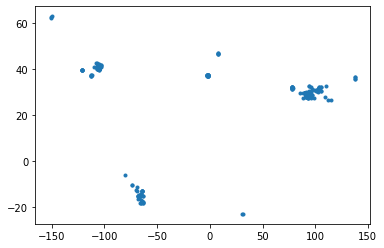

In [111]:
plt.plot(a.centroid.x[a['EBE_MMKYR']<0],a.centroid.y[a['EBE_MMKYR']<0],'.')